# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

import joblib
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings # supress warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.inspection import DecisionBoundaryDisplay

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
import imblearn
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize

In [3]:
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

# Data Processing

## Read & Merge Data

In [5]:
session_survey_df = pd.read_csv('/Users/robintran/Desktop/TL/Python_Guskey_Analysis/data/csv/session_survey.csv')
ongoing_coaching_df = pd.read_csv('/Users/robintran/Desktop/TL/Python_Guskey_Analysis/data/csv/ongoing_coaching.csv')
end_coaching_df = pd.read_csv('/Users/robintran/Desktop/TL/Python_Guskey_Analysis/data/csv/end_coaching.csv')
course_survey_df = pd.read_csv('/Users/robintran/Desktop/TL/Python_Guskey_Analysis/data/csv/course_survey.csv')

In [6]:
# Merge
survey_df = pd.concat([session_survey_df, ongoing_coaching_df, end_coaching_df, course_survey_df], ignore_index=True)

In [7]:
survey_df.head(10)

StartDate              EndDate      Status        IPAddress  \
0  2023-07-25 08:51:49  2023-07-25 08:55:42  IP Address  165.155.140.108   
1  2023-07-26 09:30:25  2023-07-26 09:33:14  IP Address  165.155.140.108   
2  2023-07-26 09:30:40  2023-07-26 09:35:15  IP Address   174.204.130.12   
3  2023-07-26 09:31:57  2023-07-26 09:36:28  IP Address  165.155.140.108   
4  2023-07-26 09:31:01  2023-07-26 09:39:33  IP Address   172.56.161.136   
5  2023-07-26 11:26:13  2023-07-26 12:49:23  IP Address   165.155.131.92   
6  2023-07-26 13:30:24  2023-07-26 13:36:30  IP Address    166.199.98.64   
7  2023-07-27 08:37:26  2023-07-27 08:41:17  IP Address    107.123.49.57   
8  2023-07-27 08:38:06  2023-07-27 08:42:23  IP Address  165.155.140.118   
9  2023-07-27 08:37:26  2023-07-27 08:42:29  IP Address  165.155.137.100   

   Progress  Duration (in seconds)  Finished         RecordedDate  \
0       100                    232      True  2023-07-25 08:55:43   
1       100                    169      True  2023-07-26 09:33:15   
2       100                    275      True  2023-07-26 09:35:16   
3       100                    271      True  2023-07-26 09:36:30   
4       100                    512      True  2023-07-26 09:39:34   
5       100                   4989      True  2023-07-26 12:49:23   
6       100                    365      True  2023-07-26 13:36:30   
7       100                    231      True  2023-07-27 08:41:18   
8       100                    257      True  2023-07-27 08:42:24   
9       100                    303      True  2023-07-27 08:42:30   

          ResponseId RecipientLastName RecipientFirstName RecipientEmail  \
0  R_3illcB1MIewmnkN               NaN                NaN            NaN   
1  R_27qEHH0dTgHyk3Z               NaN                NaN            NaN   
2  R_3MzZQ8l6IMLumA6               NaN                NaN            NaN   
3  R_33DNwTkF7EwKPSk               NaN                NaN            NaN   
4  R_wWUHGypfA9Oxtvj               NaN                NaN            NaN   
5  R_TiwHy6nWPrw1N5L               NaN                NaN            NaN   
6  R_1H8LJdlebpecTZH               NaN                NaN            NaN   
7  R_3ssSulikErb9a9I               NaN                NaN            NaN   
8  R_3ewypAVfiwzedEU               NaN                NaN            NaN   
9  R_3qUrUUi6oI2gPhB               NaN                NaN            NaN   

  ExternalReference  LocationLatitude  LocationLongitude DistributionChannel  \
0               NaN           40.8622           -73.8902           anonymous   
1               NaN           40.8622           -73.8902           anonymous   
2               NaN           40.7123           -74.0068           anonymous   
3               NaN           40.8622           -73.8902           anonymous   
4               NaN           40.7123           -74.0068           anonymous   
5               NaN           40.5948           -73.9715           anonymous   
6               NaN           40.7123           -74.0068           anonymous   
7               NaN           40.7263           -73.9818           anonymous   
8               NaN           40.8622           -73.8902           anonymous   
9               NaN           40.8477           -73.8418           anonymous   

  UserLanguage                                last_session_or_not  \
0           EN  Yes - there will be more sessions for this PL ...   
1           EN  Yes - there will be more sessions for this PL ...   
2           EN  Yes - there will be more sessions for this PL ...   
3           EN  Yes - there will be more sessions for this PL ...   
4           EN  Yes - there will be more sessions for this PL ...   
5           EN  Yes - there will be more sessions for this PL ...   
6           EN  Yes - there will be more sessions for this PL ...   
7           EN  Yes - there will be more sessions for this PL ...   
8           EN  Yes - there will be more sessions for this PL ...   
9       

## Feature Engineering & Null Handling

In [8]:
# Null values
na_percentage = survey_df.isna().mean()*100
na_percentage

StartDate                   0.000000
EndDate                     0.000000
Status                      0.000000
IPAddress                   0.100725
Progress                    0.000000
Duration (in seconds)       0.000000
Finished                    0.000000
RecordedDate                0.000000
ResponseId                  0.000000
RecipientLastName          94.802579
RecipientFirstName         94.802579
RecipientEmail             93.714746
ExternalReference          99.335214
LocationLatitude            0.000000
LocationLongitude           0.000000
DistributionChannel         0.000000
UserLanguage                0.000000
last_session_or_not         0.000000
selected_date               0.705077
email                       1.853344
initials                   98.831587
dob                        98.831587
site                        0.020145
ar_blytheville             99.536664
ar_friendship              99.335214
ar_hope                    98.791297
ar_osceola                 99.274778
d

In [9]:
# NPS null values

# Coalesce columns
survey_df['nps_all'] = survey_df['coach_nps_NPS_GROUP'].combine_first(survey_df['coach_nps'])\
                            .combine_first(survey_df['nps_NPS_GROUP'])\
                            .combine_first(survey_df['nps'])
survey_df = survey_df.drop(columns=['nps_NPS_GROUP', 'nps', 'coach_nps_NPS_GROUP', 'coach_nps'])

# Drop null NPS & site
survey_df = survey_df.dropna(subset=['nps_all'])
survey_df = survey_df.dropna(subset=['site'])

In [10]:
# Classify race
def classify_race(row):
    if row['ethnicity'] == 'Hispanic or Latino':
        return 'Hispanic/Latino'
    
    races = ['race_1', 'race_2', 'race_3', 'race_4', 'race_5', 'race_6', 'race_7']
    
    if sum(pd.notna(row[r]) for r in races) > 1:
        return 'More than one race'
    
    if pd.notna(row['race_1']) and row['race_1'] == 'Asian':
        return 'Asian'
    if pd.notna(row['race_2']) and row['race_2'] == 'Black or African American':
        return 'Black or African American'
    if pd.notna(row['race_3']) and row['race_3'] == 'Native American or Indian':
        return 'Native American or Indian'
    if pd.notna(row['race_4']) and row['race_4'] == 'White':
        return 'White'
    if pd.notna(row['race_5']) and row['race_5'] == 'Prefer not to say':
        return 'Prefer not to say'
    if pd.notna(row['race_6']) and row['race_6'] == 'I prefer to self describe':
        return 'I prefer to self describe'
    
    return 'Unknown'

survey_df['race'] = survey_df.apply(classify_race, axis=1)

In [11]:
# Convert feedback scores to numeric
for col in survey_df.columns:
    if 'coach_ongoing_feed' in col:
        survey_df[col] = survey_df[col].str.extract('(\d+)').astype(float)

In [12]:
# Handle gender, role, and second_fac_coach
survey_df['gender'].fillna('Female', inplace=True)
survey_df['role'] = survey_df['role'].replace({'Teacher or Specialist': 'Teacher'}).fillna('Other Educator')
survey_df = survey_df.dropna(subset='second_fac_coach')

## Finalize df

In [13]:
# Relevant columns -> finalize df
columns_to_keep = ['nps_all', 'coach_ongoing_feed_1', 'coach_ongoing_feed_2', 'coach_ongoing_feed_3',
                   'coach_ongoing_feed_4', 'coach_ongoing_feed_5', 'content_area', 'role',
                   'Duration (in seconds)', 'second_fac_coach', 'race', 'gender', 'location', 'site']
base_nps_df = survey_df[columns_to_keep]

In [14]:
simplified_column = ['nps_all', 'content_area', 'role','race', 'gender', 'location', 'site']
base_nps_simplified_df = survey_df[simplified_column]

In [15]:
base_nps_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3587 entries, 37 to 4164
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nps_all                3587 non-null   object 
 1   coach_ongoing_feed_1   3587 non-null   float64
 2   coach_ongoing_feed_2   3587 non-null   float64
 3   coach_ongoing_feed_3   3587 non-null   float64
 4   coach_ongoing_feed_4   3587 non-null   float64
 5   coach_ongoing_feed_5   3587 non-null   float64
 6   content_area           3587 non-null   object 
 7   role                   3587 non-null   object 
 8   Duration (in seconds)  3587 non-null   int64  
 9   second_fac_coach       3587 non-null   object 
 10  race                   3587 non-null   object 
 11  gender                 3587 non-null   object 
 12  location               3587 non-null   object 
 13  site                   3587 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 420.4+ KB


In [16]:
base_nps_simplified_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3587 entries, 37 to 4164
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nps_all       3587 non-null   object
 1   content_area  3587 non-null   object
 2   role          3587 non-null   object
 3   race          3587 non-null   object
 4   gender        3587 non-null   object
 5   location      3587 non-null   object
 6   site          3587 non-null   object
dtypes: object(7)
memory usage: 224.2+ KB


In [17]:
na_percentage = base_nps_df.isna().mean()*100
na_percentage

nps_all                  0.0
coach_ongoing_feed_1     0.0
coach_ongoing_feed_2     0.0
coach_ongoing_feed_3     0.0
coach_ongoing_feed_4     0.0
coach_ongoing_feed_5     0.0
content_area             0.0
role                     0.0
Duration (in seconds)    0.0
second_fac_coach         0.0
race                     0.0
gender                   0.0
location                 0.0
site                     0.0
dtype: float64

In [18]:
base_nps_df.head(10)

nps_all  coach_ongoing_feed_1  coach_ongoing_feed_2  \
37   Promoter                   5.0                   5.0   
39   Promoter                   5.0                   5.0   
40   Promoter                   5.0                   5.0   
41   Promoter                   5.0                   5.0   
42  Detractor                   3.0                   2.0   
67  Detractor                   5.0                   4.0   
85    Passive                   4.0                   4.0   
93   Promoter                   5.0                   5.0   
95   Promoter                   5.0                   5.0   
97   Promoter                   5.0                   5.0   

    coach_ongoing_feed_3  coach_ongoing_feed_4  coach_ongoing_feed_5  \
37                   5.0                   5.0                   4.0   
39                   5.0                   5.0                   5.0   
40                   5.0                   5.0                   5.0   
41                   5.0                   5.0                   5.0   
42                   3.0                   4.0                   4.0   
67                   5.0                   4.0                   4.0   
85                   4.0                   4.0                   3.0   
93                   5.0                   5.0                   5.0   
95                   5.0                   5.0                   5.0   
97                   5.0                   5.0                   5.0   

   content_area                            role  Duration (in seconds)  \
37         Math  School leader or administrator                    219   
39         Math  School leader or administrator                    350   
40         Math  School leader or administrator                    367   
41         Math  School leader or administrator                    376   
42         Math  School leader or administrator                    284   
67         Math           Teacher or specialist                    354   
85         Math           Teacher or specialist                    234   
93         Math           Teacher or specialist                    352   
95         Math           Teacher or specialist                    506   
97         Math           Teacher or specialist                    573   

   second_fac_coach     race  gender   location                       site  
37               No  Unknown    Male  In-person                    MA_DESE  
39               No  Unknown  Female  In-person                    MA_DESE  
40               No  Unknown  Female  In-person                    MA_DESE  
41               No  Unknown    Male  In-person                    MA_DESE  
42               No  Unknown    Male    Virtual                    MA_DESE  
67               No  Unknown  Female    Virtual  NY_Rochester City Schools  
85              Yes  Unknown  Female    Virtual                    MA_DESE  
93              Yes  Unknown  Female    Virtual                    MA_DESE  
95              Yes  Unknown  Female    Virtual                    MA_DESE  
97               No  Unknown  Female    Virtual                    MA_DESE

# Data Visualization

nps_all
Promoter     2077
Passive       982
Detractor     528
Name: count, dtype: int64


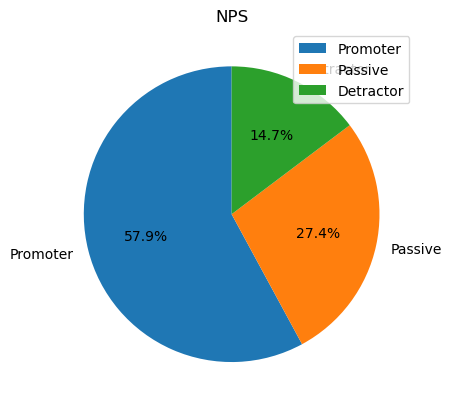

In [19]:
# Create a pie chart
nps_count = base_nps_df['nps_all'].value_counts()
print(nps_count)

labels = nps_count.index.tolist()
sizes = nps_count.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('NPS')
plt.legend(labels, loc='best')

plt.show()

# Modeling

In [20]:
X = base_nps_df[['coach_ongoing_feed_1', 'coach_ongoing_feed_2', 'coach_ongoing_feed_3',
                   'coach_ongoing_feed_4', 'coach_ongoing_feed_5', 'content_area', 'role',
                   'Duration (in seconds)', 'second_fac_coach', 'race', 'gender', 'location', 'site']]
y = base_nps_df['nps_all']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Encoder

In [21]:
categorical_columns = ['content_area', 'role', 'second_fac_coach', 'race', 'gender', 'location', 'site']

encoder = OneHotEncoder(sparse=False, drop='first')

X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Drop original columns
X_train = X_train.drop(columns=categorical_columns).reset_index(drop=True)
X_test = X_test.drop(columns=categorical_columns).reset_index(drop=True)

X_train = pd.concat([X_train, X_train_encoded_df], axis=1)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)


In [ ]:
# Frequency Encoding - might be helpful

def frequency_encoding(df, col):
    freq_encoding = df[col].value_counts() / len(df)
    df[col + '_freq_encoded'] = df[col].map(freq_encoding)
    return df

for col in categorical_columns:
    X_train = frequency_encoding(X_train, col)
    X_test = frequency_encoding(X_test, col)

X_train= X_train.drop(columns=categorical_columns).reset_index(drop=True)
X_test = X_test.drop(columns=categorical_columns).reset_index(drop=True)

## Imbalanced data

In [22]:
counter = Counter(y_train)
print(counter)

Counter({'Promoter': 1444, 'Passive': 694, 'Detractor': 372})


In [23]:
smt = SMOTE()

X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
counter = Counter(y_train_sm)
print('after', counter)

after Counter({'Promoter': 1444, 'Detractor': 1444, 'Passive': 1444})


## Models

In [24]:
logit = LogisticRegression(penalty='l2', solver='saga', multi_class='multinomial', random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', logit)
])

param_grid = {
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', refit=True)

grid_search.fit(X_train_sm, y_train_sm)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'logistic__C': 1}
Best cross-validation score: 0.58


In [25]:
y_pred = grid_search.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Detractor       0.38      0.61      0.47       156
     Passive       0.35      0.34      0.35       288
    Promoter       0.75      0.66      0.70       633

    accuracy                           0.57      1077
   macro avg       0.50      0.54      0.51      1077
weighted avg       0.59      0.57      0.57      1077



### KNN 

In [27]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto'],
    'p': [1, 2]
}

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=1)

grid_search_knn.fit(X_train, y_train)

print("Best parameters:", grid_search_knn.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best cross-validation score: 0.62


In [28]:
y_pred = grid_search_knn.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Detractor       0.43      0.21      0.28       156
     Passive       0.39      0.28      0.32       288
    Promoter       0.68      0.86      0.76       633

    accuracy                           0.61      1077
   macro avg       0.50      0.45      0.46      1077
weighted avg       0.57      0.61      0.57      1077



### Random Forest 

In [30]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [30, 50, 100],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=1)

grid_search_rf.fit(X_train, y_train)

print("Best parameters:", grid_search_rf.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_rf.best_score_))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 30}
Best cross-validation score: 0.71


In [31]:
y_pred = grid_search_rf.predict(X_test)

In [32]:
# Print performance metrics
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred))

Classification Report for Random Forest:
              precision    recall  f1-score   support

   Detractor       0.87      0.39      0.54       156
     Passive       0.54      0.48      0.51       288
    Promoter       0.77      0.91      0.83       633

    accuracy                           0.72      1077
   macro avg       0.73      0.59      0.63      1077
weighted avg       0.72      0.72      0.70      1077



### LightGBM

In [72]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test) 

In [86]:
lgbm_model = lgb.LGBMClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 7],
    'num_leaves': [31, 50],
    'subsample': [0.7, 1.0]
}

grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=2, n_jobs=1)

grid_search.fit(X_train, y_train_encoded)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 2008, number of used features: 45
[LightGBM] [Info] Start training from score -1.911162
[LightGBM] [Info] Start training from score -1.284126
[LightGBM] [Info] Start training from score -0.553039
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [87]:
y_pred = grid_search.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [75]:
print("Classification Report for LightGBM:")
print(classification_report(y_test_encoded, y_pred))

Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.87      0.39      0.54       156
           1       0.53      0.46      0.49       288
           2       0.76      0.91      0.83       633

    accuracy                           0.71      1077
   macro avg       0.72      0.59      0.62      1077
weighted avg       0.72      0.71      0.70      1077



### XGBoost

In [ ]:
xgb_model = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'subsample': [0.5, 0.7, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=2, n_jobs=1)

grid_search.fit(X_train, y_train_encoded)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

## Model Evaluation

In [81]:
# Print performance metrics
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred))

Classification Report for Random Forest:
              precision    recall  f1-score   support

   Detractor       0.87      0.39      0.54       156
     Passive       0.54      0.48      0.51       288
    Promoter       0.77      0.91      0.83       633

    accuracy                           0.72      1077
   macro avg       0.73      0.59      0.63      1077
weighted avg       0.72      0.72      0.70      1077



In [82]:
cm = confusion_matrix(y_test, y_pred)
class_labels = ['0', '1', '2']

cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
    0    1    2
0  61   63   32
1   8  139  141
2   1   56  576


In [33]:
best_rf = grid_search_rf.best_estimator_

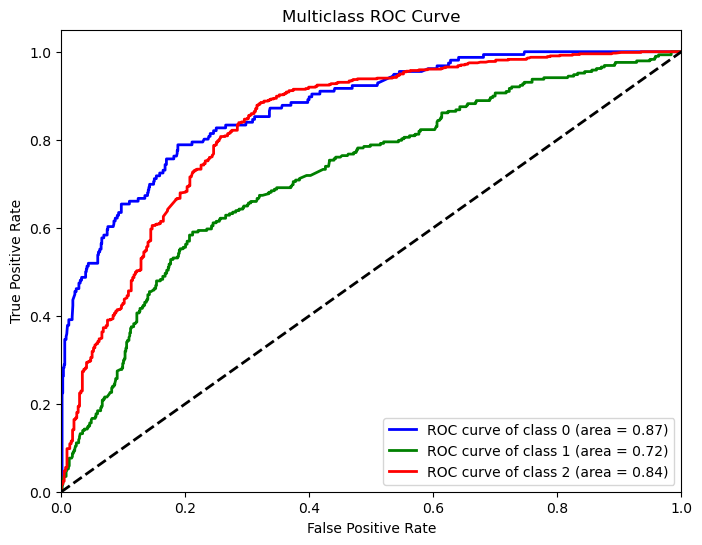

In [84]:
classes = np.unique(y_train_sm)
y_test_binarized = label_binarize(y_test, classes=classes)

n_classes = y_test_binarized.shape[1]

y_pred_proba = best_rf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [89]:
best_lightgbm = grid_search.best_estimator_

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


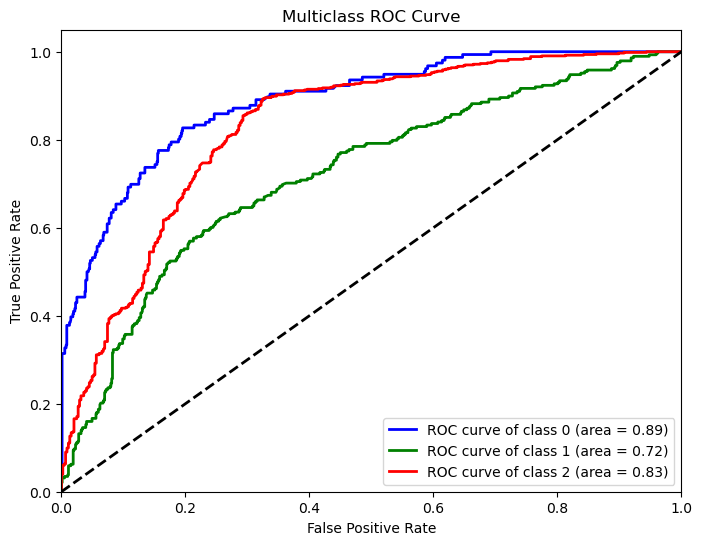

In [90]:
classes = np.unique(y_train_sm)
y_test_binarized = label_binarize(y_test, classes=classes)

n_classes = y_test_binarized.shape[1]

y_pred_proba = best_lightgbm.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [34]:
joblib.dump(best_rf, '/Users/robintran/Desktop/best_rf_model.pkl')

['/Users/robintran/Desktop/best_rf_model.pkl']

In [ ]:
model = joblib.load('/Users/robintran/Desktop/best_rf_model.pkl')